In [5]:
!pip install matplotlib
!pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')


<div dir=rtl >
<h1>خوشه‌بندی</h1>
خوشه‌بندی به دسته‌بندی اشیا‌ به گونه‌ای گفته می‌شود که اشیا موجود در هر دسته نسبت به دیگر اشیا سایر دسته‌ها شباهت بیشتری داشته باشند.

<img src="https://drive.google.com/uc?id=1RDHbS2bWOKM4WAq7sGMhrVLLBxegNer0"></img>

چند مورد از کاربردهای رایج این الگوریتم‌ها در زیر اشاره شده است:
- فشرده‌سازی
- سامانه‌های توصیه‌گر (recommender systemss)
- دسته‌بندی بر اساس شباهت
  - دسته‌بندی صفحات شبیه بهم وب (برای مثال گوگل نیوز)
  - دسته‌بندی مشتریان بر اساس سلیقه خرید برای ارائه خدمت بهتر
</div>


<div dir=rtl>
<h2>داده‌های نمونه</h2>
برای شروع کار، داده‌های تصادفی را تولید می‌کنیم.

<font color='Red'> توجه: از تغییردادن متغییرها اجتناب کنید.  </font>
</div>

In [9]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
print(X.shape)

(100, 2)


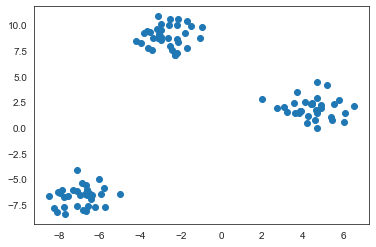

In [10]:
plt.scatter(X[:, 0], X[:, 1])

<div dir=rtl>
<h2>الگوریتم k-means</h2>
<div>
یکی از الگوریتم‌های ساده و نسبتاً پرکاربرد برای خوشه‌بندی الگوریتم k-means است. هدف ما در این تمرین پیاده‌سازی این الگوریتم نیست و فقط آَشنایی با آن است. برای استفاده از این الگوریتم و الگوریتم‌های دیگر خوشه‌بندی می‌توانید ماژول‌های <code>sklearn.cluster</code> را مشاهده کنید.</div>
</div>

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

<div dir=rtl>
خط کد بالا، این الگوریتم را پیاده‌سازی می‌کند. درآن <code>n_clusters</code> تعداد خوشه‌ها را مشخص می‌کند.

<font color='Green'> پرسش: ما می‌توانیم برچسب‌های خوشه‌ی هر داده را در این الگوریتم داشته باشیم. قطعه کدی بنویسید که برچسب‌های هر کدام از داده‌ها را پرینت کند. این برچسب‌ها را در متغیر <code>labels</code> قرار دهید.  </font>
</div>

<div dir=rtl >
    <font color='Blue'> 
    در این بخش kmeans را روی داده‌ها فیت می‌کنیم و آرایه‌ی لیبل‌ها را چاپ می‌کنیم که چون سه خوشه داریم به ازای هر داده یکی از اعداد ۰،۱ یا ۲ به عنوان برچسب داده مشاهده خواهد شد.
        </font> 
 <div>

In [12]:
kmeans.fit(X)
labels = kmeans.labels_
labels

array([1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2,
       2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2], dtype=int32)

<div dir=rtl>
<h2>مشاهده نتیجه</h2>
ما می‌توانیم نتیجه‌ی خوشه‌بندی را با قطعه کد زیر مشاهده کنیم. در این قطعه کد می‌توانیم پالت رنگی برای رسم را موارد متفاوتی قرار دهیم. در این کد ما از پالت رنگ‌های سرد استفاده کردیم.

</dir>

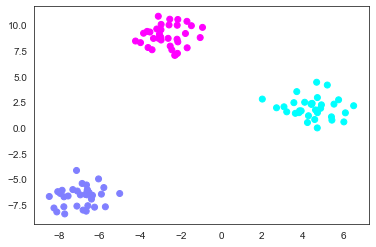

In [13]:
plt.scatter(X[:, 0], X[:, 1], cmap=plt.cm.cool, c=labels)

<div dir=rtl>
<h2>تعیین تعداد خوشه‌ها</h2>
یکی از ضعف‌های الگوریتم k-means مشخص کردن تعداد خوشه‌هاست. در این مثال با مشاهده شکل توانسیم که تعداد خوشه‌ها را حدس بزنیم. اما در دنیای واقعی این کار قابل انجام نیست. یکی از راه‌ها کاهش بعد با استفاده از PCA است که در تمرین اول مشاهده کردید. روش دیگر استفاده از روش آرنج (elbow) است.


<font color='Green'> پرسش: اگر تعداد خوشه‌ها را برای داده‌های قبل 2 در نظر بگیریم، نمودار قبلی را برای این حالت رسم کنید. دقت کنید که <code>random_state=42</code> باشد. </font>
</div>

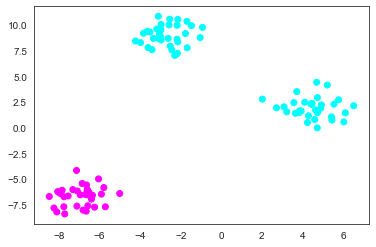

In [14]:
second_kmeans = KMeans(n_clusters=2, random_state=42)
second_kmeans.fit(X)
second_labels = second_kmeans.labels_
plt.scatter(X[:, 0], X[:, 1], cmap=plt.cm.cool, c=second_labels)

<div dir=rtl>
<h2>روش آرنج (elbow)</h2>
شما در درس با روش آرنج آشنا شده‌اید.

<font color='Green'> پرسش: روش آرنج را برای مقدار خوشه‌های 1 تا 10 حساب کنید و نمودار میزان تابع هزینه را برای هر خوشه رسم کنید. برای هر مرحله <code>random_state</code> را برابر با صفر در نظر بگیرید.  
</div>

<div dir=rtl >
    <font color='Blue'> 
    ابتدا ده مرحله کلاسترینگ انجام می‌دهیم و inertia هر مرحله را ذخیره می‌کنیم و سپس آن‌ها را پلات می‌کنیم.
        به وضوح حالت آرنج در نمودار دیده می‌شود و اولین نقطه‌ایی که هزینه در حال diminish شدن است همان آرنج نمودار است که k در آن برابر با سه است و بنابراین طبق این روش مناسب‌ترین k است.
        </font> 
 <div>

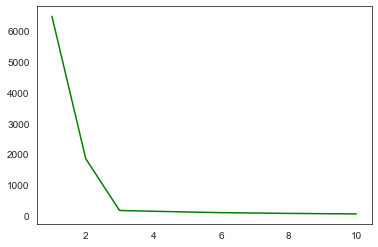

In [15]:
import sklearn
def do_plotting(costs):
    x_ax = [i+1 for i in range(len(costs))]
    y_ax = costs
    plt.plot(x_ax, y_ax,color = 'green')
    plt.show()

inertias = []
for k in range(1,11):
    new_kmeans = KMeans(n_clusters=k, random_state=42)
    new_kmeans.fit(X)
    inertias.append(new_kmeans.inertia_)

do_plotting(inertias)

<div dir=rtl>
<h2>خوشه‌بندی‌های پیچیده‌تر</h2>
همیشه خوشه‌بندی‌ها به این صورت نیست. همچنین k-means تنها الگوریتم خوشه‌بندی نیست. در زیر توزیع‌های مختلف داده‌های مختلف با روش k-means رسم شده‌است.

 شما می‌توانید مشاهده کنید که در کدام حالت این الگوریتم خوب عمل می‌کند.

تمامی این‌ کدها از سند مطالب <code>sklearn</code> استفاده شده است. شما می‌توانید این اسناد را در <a href="https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html"> اینجا</a> مشاهده کنید.


همچنین می‌توانید الگوریتم‌های دیگر را نیز در اسناد <code>sklearn</code> مشاهده کنید.
</div>

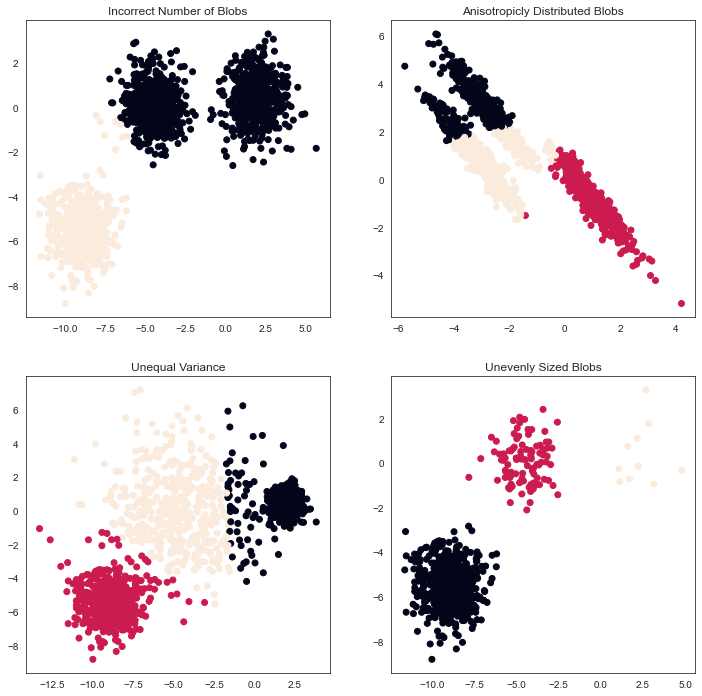

In [16]:
sns.set_style('white')

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()


<div dir=rtl> 

<font color='Green'> پرسش: خوشه‌بندی اعداد

مجموعه داده‌ی digits در زیر لود شده است. الگوریتم k-means را برای این مجموعه داده پیاده کنید. تعداد خوشه‌ها را برابر با 10 در نظر بگیرید. مراکز خوشه‌ها را نمایش دهید. برای این کار هر 64 عدد را به ماتریس 8 در 8 تبدیل کنید. پس از آن از plt.imshow استفاده کنید. آیا می‌توان با مرکز تشخیص داد برای کدام دسته از اعداد است؟
</font>  


<font color='Green'> پرسش: استفاده از Isomap

این الگوریتم نیز مانند PCA کار کاهش بعد را انجام میدهد. با استفاده از این الگوریتم (موجود در <code>sklean.manifold.Isomap</code>) داده‌ها را به داده‌هایی با بعد 2 تبدیل کنید. پس از آن دو نمودار رسم کنید. نمودار اول رنگ هر داده را با لیبل‌هایی که الگوریتم kmeans تولید کرده است تعیین کنید و نمودار دوم رنگ هر داده برابر با digits.target که همان لیبل کلاس است، فرض بگیرید. چه چیزی متوجه می‌شوید؟
</font>  
</div>

<div dir=rtl >
    <font color='Blue'> 
    همانطور که گفته شد کلاسترینگ را روی digitها انجام دادیم و مراکز را رسم کردیم و طبق نتایج تا حدودی می‌توان گفت که هر مرکز متعلق به کدام عدد است. چیزی که به نظر می‌آید این است که مراکز به ترتیب متعلق به اعداد صفر، نه، دو، یک، شش، هشت، چهار، پنج، هفت و سه هستند.
    </font>
</div>

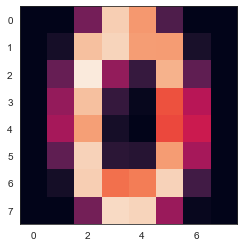

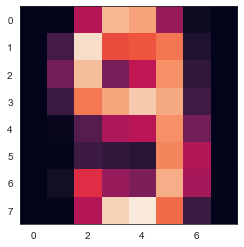

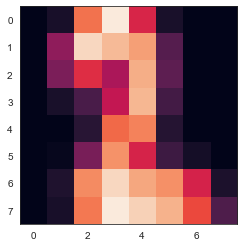

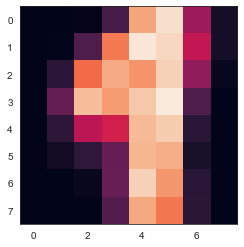

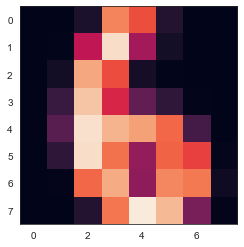

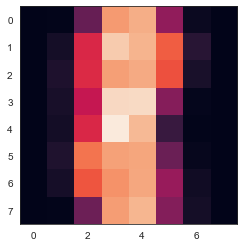

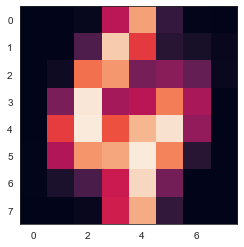

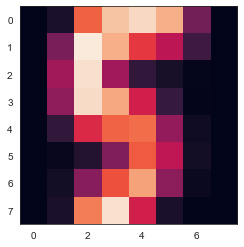

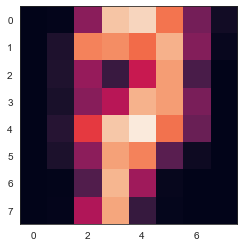

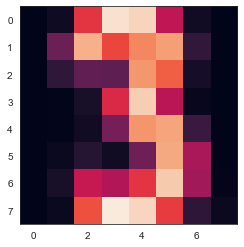

In [17]:
from sklearn.datasets import load_digits
digits = load_digits()

digit_kmeans = KMeans(n_clusters=10, random_state=42)
digit_kmeans.fit(digits.data)
centers = digit_kmeans.cluster_centers_
for center in centers:
    reshaped_center = np.reshape(center,(8,8))
    plt.figure()
    plt.imshow(reshaped_center)

<div dir=rtl >
    <font color='Blue'> 
        با توجه به نمودارهای به دست آمده (که اولی با لیبل‌های الگوریتم kmeans و دوم با targetها رسم شده است) مشاهده می‌کنیم که الگوریتم kmeans عملکرد خوبی روی توزیع این داده‌ها داشته است و کلاستر‌هایی که ایجاد کرده است به شکل مناسبی شباهت‌ها و تفاوت‌های تصاویر اعداد را capture کرده است.
        لازم به ذکر است که تفاوت رنگ‌های کلاسترها در دو نمودار اهمیتی ندارد چرا که ترتیب شماره گذاری کلاستر‌ها توسط الگوریتم و تارگت‌های دیتاست متفاوت بوده است اما از نظر ماهیت منطبق هستند.
    </font>
</div>

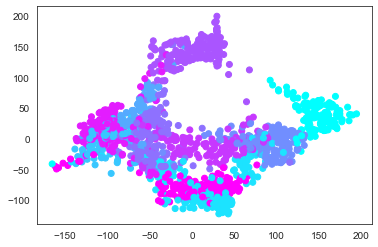

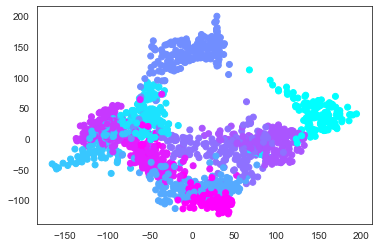

In [18]:
from sklearn.manifold import Isomap

embedding = Isomap(n_components=2)
transformed_digits = embedding.fit_transform(digits.data)
plt.figure()
plt.scatter(transformed_digits[:, 0], transformed_digits[:, 1], cmap=plt.cm.cool, c=digit_kmeans.labels_)
plt.figure()
plt.scatter(transformed_digits[:, 0], transformed_digits[:, 1], cmap=plt.cm.cool, c=digits.target)

<div dir=rtl> 

<font color='Green'> پرسش: کاهش حجم عکس با kmeans
</font>

<font color='Green'>
یکی از کاربردهای این الگوریتم کاهش حجم است. در تصویری که همراه با تمرین قرار داده شده است. شما تصویر یک پرنده را میبینید. در قطعه کد زیر (سومین قطعه کد) شما توزیع رنگی استفاده شده در این عکس را مشاهده می‌کنید. حال کاری که شما باید کنید این است که این رنگ‌ها را به 4 خوشه تقسیم کنید و به جای هر رنگ از مرکز آن خوشه استفاده کنید. سپس تصویر را با رنگ‌های جدید ترسیم کنید.
</font>  

قطعه کد اول برای اتصال گوگل کولب به گوگل درایو شما است. در صورتی که از گوگل کولب استفاده نمیکنید، این قطعه کد را اجرا نکنید. قطعه کد دوم عکس را لود میکند. در ورودی تابع imread آدرس عکس را قرار دهید. اگر از گوگل کولب استفاده میکنید، باید ابتدا این عکس را در درایو خود آپلود کنید و آدرس آن را وارد کنید.
</div>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

In [19]:
from matplotlib.pyplot import imread

img = imread('bird.jpg')

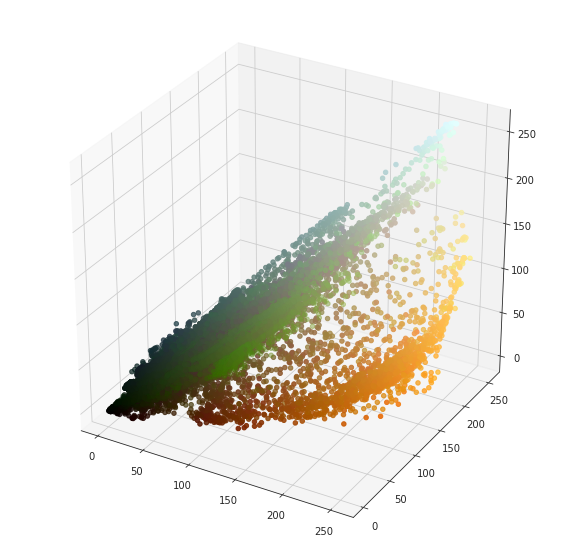

In [ ]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')

A = img.reshape((img.shape[0] *img.shape[1], 3))

ax.scatter3D(A[:, 0], A[:, 1], A[:, 2], color=A[:]/255.0)

<div dir=rtl >
    <font color='Blue'> 
        برای این قسمت ابتدا مقادیر rgb رنگ‌های پیکسل‌ها را از هم جدا می‌کنیم؛ یعنی با reshape کردن تصویر، هر عضو از ماتریس جدید به یک سه تایی rgb تبدیل می‌شود که رنگ موجود در یک پیکسل را کد می‌کند. سپس این داده‌های جدید را با الگوریتم kmeans خوشه‌بندی می‌کنیم و مراکز را به دست می‌آوریم. چون این مراکز centroid هستند بنابراین می‌توانند integer نباشند و ابتدا باید آن‌ها را به مقادیر integer  تبدیل کنیم. نهایتا تصویر نهایی را به این صورت به دست می‌آوریم که به جای مقدار هر پیکسل، مقادیر centroid خوشه‌ی آن را قرار می‌دهیم (خوشه‌ی هر پیکسل از لیبل‌های حاصل از الگوریتم به دست می‌آید). در پایان نیز داده‌ها را به ابعاد اولیه‌ی عکس reshape می‌کنیم و عکس جدید را ترسیم می‌کنیم.
    </font>
</div>

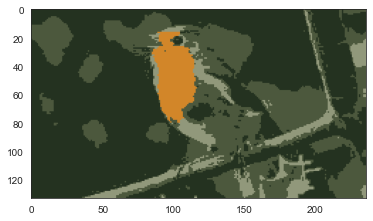

In [20]:
(h,w,c) = img.shape
rgb = img.reshape(h*w,c)

color_kmeans = KMeans(n_clusters=4, random_state=42)
color_kmeans.fit(rgb)
int_centers = color_kmeans.cluster_centers_.round(0).astype(int)
clustered_colored_img = np.reshape(int_centers[color_kmeans.labels_],(h,w,c)) 
plt.imshow(clustered_colored_img)


<div dir=rtl >
<h1>الگوریتم DBSCAN</h1>

الگوریتم DBSCAN از دیگر الگوریتم‌های مورد استفاده برای خوشه‌بندی داده‌ها می‌باشد که می‌تواند داده‌هایی با شکل‌های مختلف را خوشه‌بندی کند و نویزها و ناهنجاری‌های موجود در داده‌ها را تشخیص دهد.

 با توجه به مزیت گفته شده، در این بخش می‌خواهیم دو مجموعه داده‌ گفته شده در بخش "خوشه‌بندی‌های پیچیده‌تر" را با استفاده از الگوریتم DBSCAN مجدد  خوشه‌بندی کنیم.
 مجموعه داده‌های 
<code> X_aniso</code> و <code>X_varied</code>
را در نظر بگیرید.

 برای اجرای الگوریتم DBSCAN نیازی به تعیین تعداد خوشه‌ها نیست و شما می‌بایست دو پارامتر اصلی این الگوریتم یعنی اپسیلون و حداقل تعداد نقاط هر خوشه را به نحوی تعیین کنید که خروجی شما دقیق‌تر شود. 


</div>





<div dir=rtl >
<h1>تعیین اپسیلون</h1>

 برای پیدا کردن بهترین اپسیلون متناسب با مجموعه داده، علاوه‌بر آزمودن مقادیر مختلف، از روش فاصله KNN (محاسبه میانگین فاصله بین هر نقطه و k نزدیک‌ترین همسایه آن) نیز برای تعیین خودکار مقدار اپسیلون بهینه استفاده می‌شود. 

 k در اینجا برابر است با حداقل تعداد نقاط در خوشه که همان معادل MinPts می‌باشد. برخلاف پارامتر اپسیلون، برای تعیین MinPts هیچ روش خودکاری وجود ندارد. اما با توجه به برخی ویژگی‌های مجموعه داده‌ها چند قانون کلی وجود دارد که می‌تواند در پیدا کردن محدوده مقادیر مناسب MinPts آن مجموعه داده به ما کمک کند. 

<font color='Green'> پرسش: علت استفاده از KNN برای پیدا کردن اپسیلون بهینه را شرح دهید. سپس با رسم گراف k-distance  و با پیروی از الگوی آرنج مقدار اپسیلون بهینه را   بدست آورید.

<font color='Green'>  برای رسم گراف k-distace ‌می‌توانید از ماژول NearestNeighbors در کنابخانه Scikit-learn و برای مشخص کردن مقدار اپسیلون از کتابخانه kneed استفاده کنید.



</div>




<div dir=rtl >
    <font color='Blue'> 
     در این روش ابتدا فاصله‌ی kتا نزدیک‌ترین داده تا هر کدام از data point‌ها را به دست می‌آوریم و فاصله‌ی نقاط را به صورت صعودی  مرتب می‌کنیم به این صورت که فاصله نزدیک‌ترین نقاط نسبت به هر داده نسبت به هم سورت می‌شوند و دومین نزدیک‌ترین‌ها نسبت به هم و همینطور تا k ادامه می‌یابد.
        سپس طبق مقاله مرجع این روش فاصله نزدیک‌ترین نقاط که اکنون مرتب هستند در یک نمودار رسم می‌شوند. نقطه‌ای از این نمودار که برای اولین بار در آن صعود بسیار چشمگیر مشاهده می‌شود همان نقطه آرنج است و تحلیل این نقطه این است که در این نقطه فاصله‌ی اندازه‌گیری شده احتمالا آخرین فاصله‌ای بوده است که مربوط به دو داده در یک خوشه یکسان بوده است و پس از این نقطه، فواصل احتمالا مربوط به داده‌های با خوشه‌های متفاوت بوده است. بنابراین نقطه‌ی آرنج می‌تواند به نوعی اپسیلون بهینه‌ای را به ما بدهد که در صورتی که اپسیلون بیشتر از آن در نظر گرفته شود با احتمال بیشتری داده‌های متعلق به دو خوشه‌ی متفاوت در یک خوشه قرار می‌گیرند و از کیفیت خوشه‌بندی کاسته می‌شود.
        <br>
        </font>
</div>
<div>
    <font color='Blue'> 
        Rahmah, Nadia, and Imas Sukaesih Sitanggang. "Determination of optimal epsilon (eps) value on dbscan algorithm to clustering data on peatland hotspots in sumatra." IOP conference series: earth and environmental science. Vol. 31. No. 1. IOP Publishing, 2016.
  </font>  </div>

In [21]:
!pip install --upgrade kneed

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import v_measure_score
from kneed import KneeLocator
import pandas as pd 

X_aniso epsilon: 0.19704892459671797
X_varied epsilon: 0.6486796754308802


<Figure size 432x288 with 0 Axes>

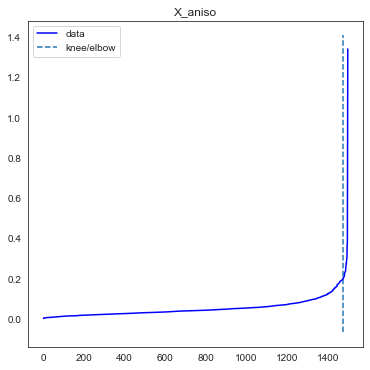

<Figure size 432x288 with 0 Axes>

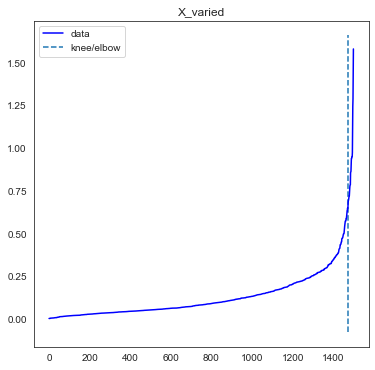

In [126]:
def get_optimal_epsilon(X, title):   
    neighbors = NearestNeighbors(n_neighbors=6)
    neighbors_fit = neighbors.fit(X)
    distances, indices = neighbors_fit.kneighbors(X)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    i = np.arange(len(distances))
    
    kneedle = KneeLocator(i, distances, curve = "convex", direction = "increasing")
    plt.figure()
    kneedle.plot_knee()
    plt.title(title)
    print(title +" epsilon: " + str(distances[kneedle.knee]))
    return distances[kneedle.knee]

eps_a = get_optimal_epsilon(X_aniso, "X_aniso")
eps_v = get_optimal_epsilon(X_varied, "X_varied")


<div dir=rtl >
<h1>تعیین MinPts</h1>

در مرحله قبل برای تعیین اپسیلون بهینه  مقدار MinPts را نیز مشخص کردیم. اما لزوما با آن مقدار  بهترین خوشه‌بندی را نخواهیم داشت.

<font color='Green'> پرسش: در این مرحله با در نظر گرفتن اپسیلون بدست آمده و با آزمودن مقادیر مختلف برای  پارامتر MinPts، بهترین حالت برای خوشه‌بندی را با استفاده از رنگ‌بندی مناسب رسم کنید. 

</div>




<div dir=rtl >
    <font color='Blue'> 
     موارد متفاوتی برای MinPts تست شد و نهایتا تعداد ۴ برای مجموعه داده‌ی X_aniso و تعداد ۹ برای مجموعه داده‌ی X_varied بهترین حالت را ایجاد کردند.
    </font>
</div>

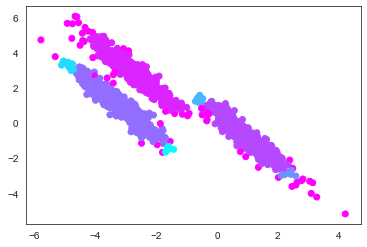

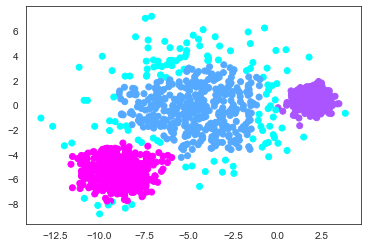

In [185]:
MinPts = 4
MinPts2 = 9

dbscan_aniso = DBSCAN(eps = eps_a, min_samples=MinPts).fit(X_aniso)
labels_aniso = dbscan_aniso.labels_

plt.figure()
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], cmap=plt.cm.cool_r, c=labels_aniso)

dbscan_varied = DBSCAN(eps=eps_v, min_samples=MinPts2).fit(X_varied)
labels_varied = dbscan_varied.labels_

plt.figure()
plt.scatter(X_varied[:, 0], X_varied[:, 1], cmap=plt.cm.cool, c=labels_varied)


<div dir=rtl >
<h1>بررسی نتایج</h1>


<font color='Green'> پرسش: خوشه‌های حاصل از اعمال دو الگوریتم k-means و DBSCAN بر روی این دو مجموعه داده را با یکدیگر مقایسه کنید. چه نتیجه‌ای می‌گیرید؟ 

</div>




<div dir=rtl >
    <font color='Blue'> 
     همانطور که از نتایج مشاهده می‌شود، خوشه‌بندی داده‌های X_aniso با استفاده از DBSCAN به مراتب با نتیجه‌ی مطلوب‌تری نسبت به kmeans همراه بوده است و علت نیز این است که kmeans اصولا با داده‌هایی کهspherical هستند عملکرد مطلوبی دارد اما DBSCAN می‌تواند داده‌ها را با شکل‌های مختلف cluster کند.
        <br>
        همچنین در مجموعه داده‌ی X_varied الگوریتم kmeans در خوشه‌بندی خوشه‌های چپ و راست که نسبت به بقیه‌ی خوشه‌ها جداتر هستند و حالت convexتری داشتند خیلی بد عمل نکرده است اما در خوشه‌بندی قسمت میانی که نسبتا می‌توان گفت حالت  concave دارد ضعیف عمل کرده است. <br>
        به طور کلی در خوشه‌بندی این دو مجموعه داده DBSCAN عملکرد مطلوب‌تری داشته است.
    </font>
</div>